In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc_data = pd.read_csv('creditcard.csv')
cc_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Exploratory Data Analysis (EDA)

In [3]:
# view info of the dataset
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# determine value counts of "Class"
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
cases = len(cc_data)
nonfraud_count = len(cc_data[cc_data.Class == 0]) 
fraud_count = len(cc_data[cc_data.Class == 1])  

print('Total number of transactions:', cases)
print('Total number of non-fraudulent transactions:', nonfraud_count)
print('Total number of fraudulent transactions:', fraud_count)
print('Percentage of non-fraudulent transactions:', round(nonfraud_count/cases*100,2),'%')
print('Percentage of fraudulent transactions:', round(fraud_count/cases*100,2),'%')

Total number of transactions: 284807
Total number of non-fraudulent transactions: 284315
Total number of fraudulent transactions: 492
Percentage of non-fraudulent transactions: 99.83 %
Percentage of fraudulent transactions: 0.17 %


In [7]:
# Perform statistical summary of non-fraudulent cases amount
nonfraud_df = (cc_data[cc_data.Class == 0])
nonfraud_df['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
# Perform statistical summary of fraudulent cases amount
fraud_df = (cc_data[cc_data.Class == 1])
fraud_df['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Data Visualization

[]

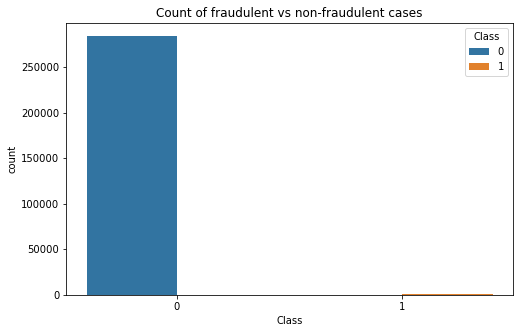

In [9]:
# plotting bar graph for classes
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot('Class', data=cc_data, hue='Class')
ax.set_title('Count of fraudulent vs non-fraudulent cases')
plt.plot()

Text(0.5, 1.0, 'Correlation Matrix of Credit Card Cases')

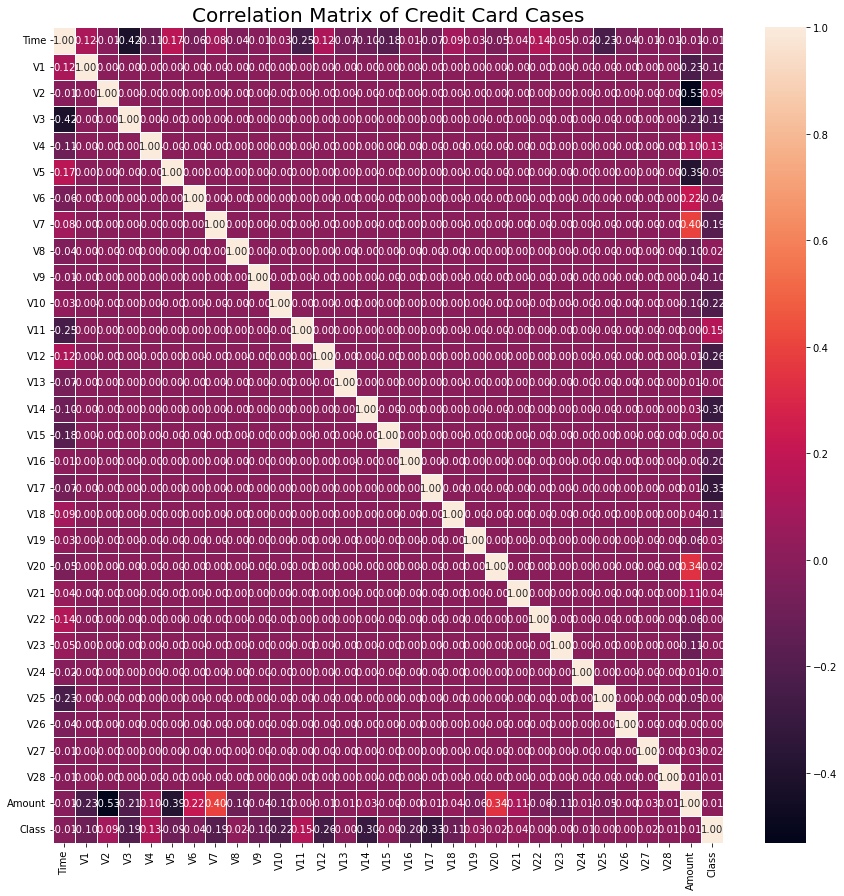

In [10]:
# Correlation Matrix
corr_matrix = cc_data.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True, 
               fmt = ".2f")
plt.title("Correlation Matrix of Credit Card Cases", fontsize = 20)

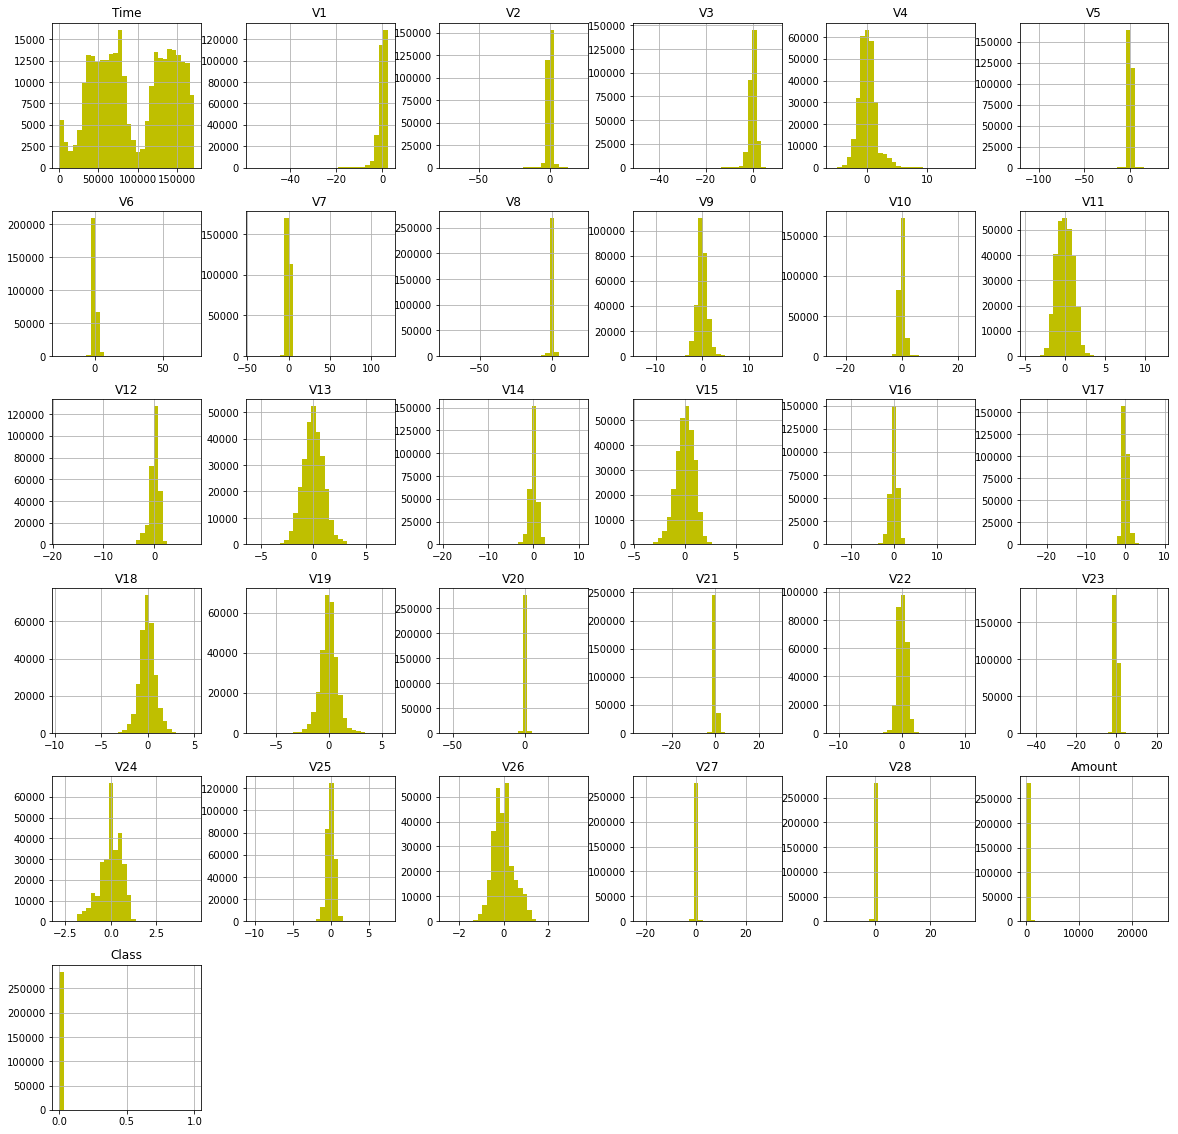

In [11]:
cc_data.hist(bins = 30, figsize = (20,20), color = 'y');

Text(0.5, 0, 'Time(s)')

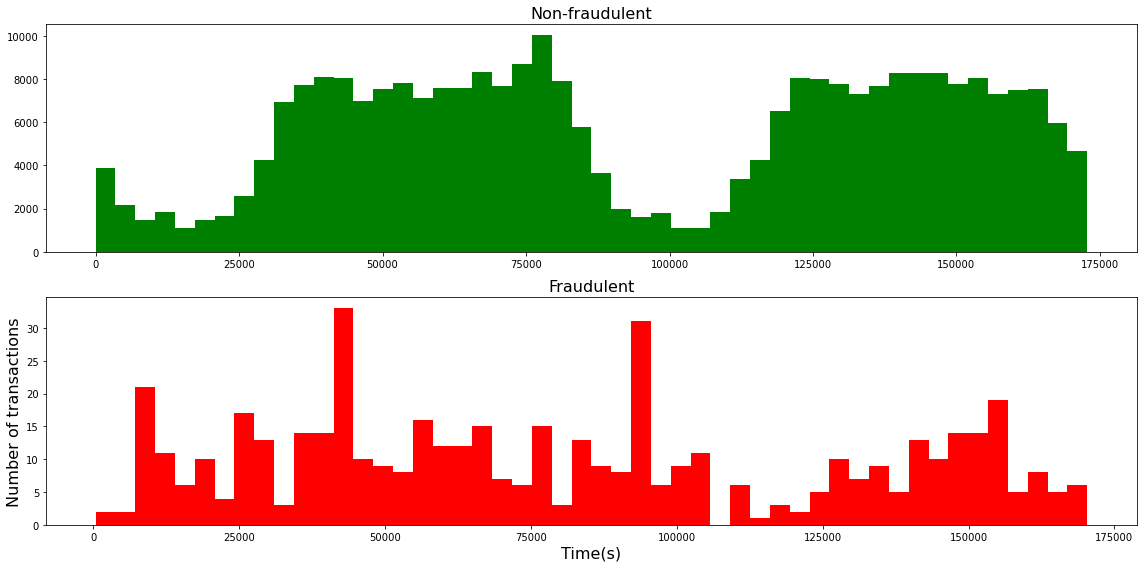

In [12]:
# Plotting Classes against time

fig, ax = plt.subplots(2, 1, figsize=(16,8), tight_layout=True)


ax[0].hist(cc_data['Time'][cc_data['Class'] == 0], bins=50, color='g')
ax[1].hist(cc_data['Time'][cc_data['Class'] == 1], bins=50, color='r')

ax[0].set_title('Non-fraudulent', size=16)
ax[1].set_title('Fraudulent', size=16)


plt.ylabel('Number of transactions', size=16)
plt.xlabel('Time(s)',size=16)

Text(0.5, 1.0, 'Comparison of Fradulent and non-fraudulent amount per transaction')

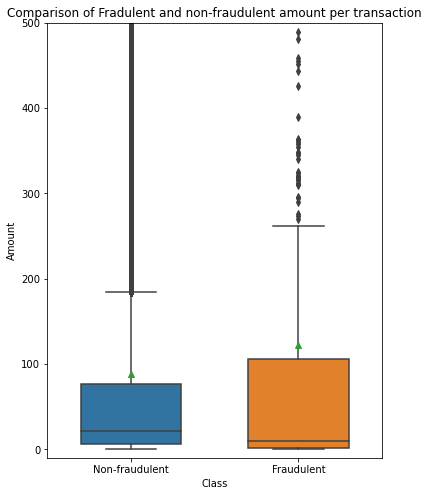

In [13]:
# Plotting "Amount" variables for both classes
plt.figure(figsize=(6,8))
sns.boxplot(x=cc_data['Class'], y=cc_data['Amount'], showmeans=True, width=0.6);
plt.ylim((-10,500))
plt.xticks([0,1], ['Non-fraudulent', 'Fraudulent'])
plt.title('Comparison of Fradulent and non-fraudulent amount per transaction')

#### Data Preparation

In [14]:
# Standardization: transform data to have a mean of 0 and std of 1

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
cc_data['std_amount']=scaler.fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data['std_time']=scaler.fit_transform(cc_data['Time'].values.reshape(-1,1))

cc_data.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,std_amount,std_time
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00,0.00,-0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04,1.00,1.00
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00,-0.35,-2.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00,-0.33,-0.86
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00,-0.27,-0.21
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00,-0.04,0.94
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00,102.36,1.64


In [15]:
# Drop columns 'Time' & 'Amount'
cc_data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [16]:
# Check standardized scaler
cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


##### Identify feature importance and prepare the data before model training 

In [17]:
X = cc_data.drop(['Class'], axis = 'columns') 
y = cc_data['Class']

In [18]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'std_amount',
       'std_time'],
      dtype='object')

In [19]:
X.shape

(284807, 30)

In [20]:
y.shape

(284807,)

In [21]:
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 150)

In [22]:
# Confirming the shape of test size after train_test_split
X_test.shape

(56962, 30)

In [23]:
X_train.shape

(227845, 30)

In [24]:
# Balancing the data since Class 0 & 1 is unbalanced
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

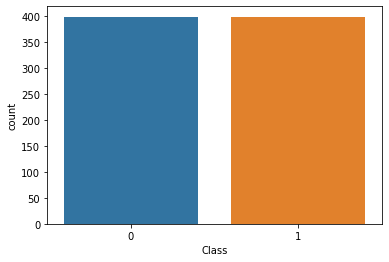

In [25]:
# Perform count plot to confirm that the dataset is balanced
sns.countplot(y_rus)

##### Logistic Regression Classifier Model

In [26]:
# Instantiate the model and apply the fit method  passing on the model, passing along input & output data

model_LR = LogisticRegression()
model_LR.fit(X_rus, y_rus) 

LogisticRegression()

In [27]:
# Generate prediction of the model
y_predict = model_LR.predict(X_test)

In [28]:
# Print the classification report
print('Classification report: \n', classification_report(y_test, y_predict))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56869
           1       0.04      0.89      0.07        93

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



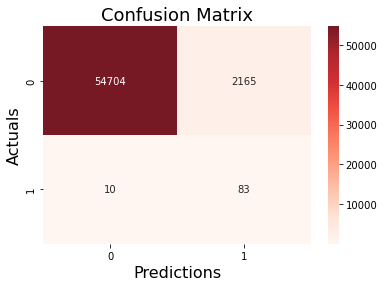

In [29]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, alpha=0.9)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [30]:
model_LR.predict_proba(X_test)

array([[0.96907964, 0.03092036],
       [0.98541065, 0.01458935],
       [0.96396309, 0.03603691],
       ...,
       [0.87117985, 0.12882015],
       [0.92501239, 0.07498761],
       [0.98898449, 0.01101551]])

In [31]:
model_LR.predict_proba(X_test)[:,1]

array([0.03092036, 0.01458935, 0.03603691, ..., 0.12882015, 0.07498761,
       0.01101551])

#### Naive Bayes Classification Model

In [32]:
# Instantiate the model and apply the fit method  passing on the model, passing along input & output data

from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_rus, y_rus)

GaussianNB()

In [33]:
# Generate prediction
y_predict = model_NB.predict(X_test)

In [34]:
# Print the classification report
print('Classification report: \n', classification_report(y_test, y_predict))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56869
           1       0.05      0.83      0.09        93

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.54     56962
weighted avg       1.00      0.97      0.99     56962



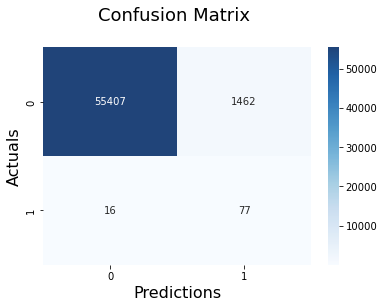

In [35]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot = True, fmt ='d', cmap=plt.cm.Blues, alpha=0.9)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix \n', fontsize=18)
plt.show()

#### K-Nearest Neighbors Classifier Model

In [36]:
# Instantiate the model and apply the fit method  passing on the model, passing along input & output data

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_rus, y_rus)

KNeighborsClassifier()

In [37]:
# Generate prediction of the model
y_predict = model_KNN.predict(X_test)

In [38]:
# Print the classification report
print('Classification report: \n', classification_report(y_test, y_predict))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.05      0.85      0.10        93

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



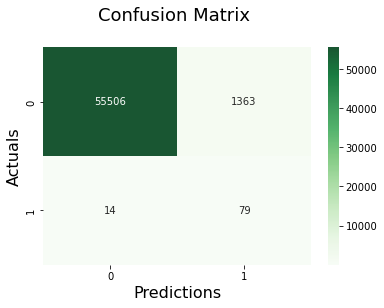

In [39]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, alpha=0.9)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix \n', fontsize=18)
plt.show()

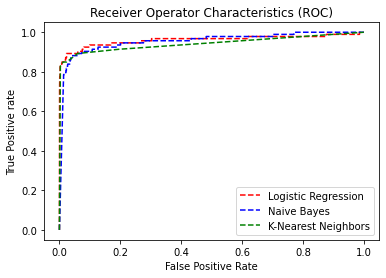

In [40]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_NB.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_KNN.predict_proba(X_test)[:, 1], pos_label = 1)

plt.plot(fpr1, tpr1, linestyle = '--', color = 'red', label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = '--', color = 'blue', label = 'Naive Bayes')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'green', label = 'K-Nearest Neighbors')

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [41]:
# Print AUC and accuracy score
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
print("Logistic Regression \nAUC: ", auc_score1) 
print("Accuracy: {}".format(accuracy_score(y_test, model_LR.predict(X_test))))

auc_score2 = roc_auc_score(y_test, model_NB.predict_proba(X_test)[:, 1])
print('Naive Bayes \nAUC:' , auc_score2) 
print("Accuracy: {}".format(accuracy_score(y_test, model_NB.predict(X_test))))

auc_score3 = roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:, 1])
print('K-Nearest Neighbour \nAUC:' , auc_score3) 
print("Accuracy: {}".format(accuracy_score(y_test, model_KNN.predict(X_test))))

Logistic Regression 
AUC:  0.9606207777656137
Accuracy: 0.9618166496962888
Naive Bayes 
AUC: 0.9551513126659517
Accuracy: 0.9740528773568344
K-Nearest Neighbour 
AUC: 0.9425464144439106
Accuracy: 0.9758259892559952
